<a href="https://colab.research.google.com/github/utrionedv/matstat_kursa4/blob/main/%D0%BF%D1%805_%D0%B1%D1%83%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.DataFrame()
df1 = pd.read_csv("/content/1.txt", header=None)
df1.columns = ['x', 'y']
df1

,x,y
0,5.000000,-1.321661
1,5.202020,-3.167984
2,5.404040,-2.915982
3,5.606061,-1.639423
4,5.808081,-3.669885
...,...,...
95,24.191919,-17.932874
96,24.393939,-19.731679
97,24.595960,-20.525017
98,24.797980,-18.669100


Коэффициент корреляции Пирсона:  -0.98845871233015
Cвязь отрицательная.
Характеристика связи: весьма высокая.
t-статистика:  64.59310319823864     t-критическое:  1.984467454426692
Нулевая гипотеза H0 (r = 0. Коэффициент корреляции не отличается от нуля) отвергается.

a =  -0.8554660176487521 ;  b =  2.0671005811008687



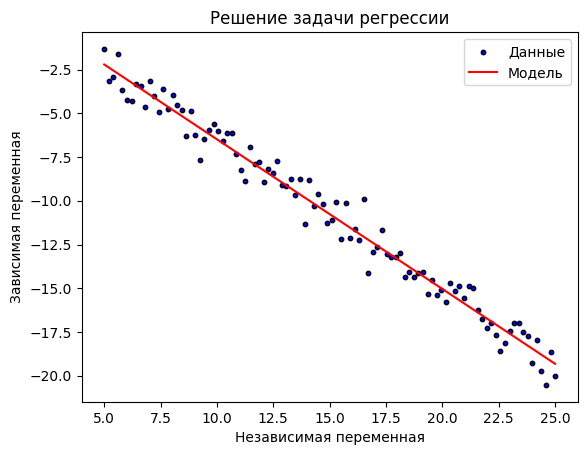

In [ ]:
xmean = df1['x'].mean()
ymean = df1['y'].mean()
xstd = df1['x'].std()
xymean = (df1['x']*df1['y']).mean()
Sx = (sum((df1['x']**2) - (xmean**2))/ len(df1)) ** 0.5
Sy = (sum((df1['y']**2) - (ymean**2))/ len(df1)) ** 0.5

r = (xymean - xmean*ymean)/(Sx*Sy)

print("Коэффициент корреляции Пирсона: ", r)
if (r<0):
  print('Cвязь отрицательная.')
elif (r == 0):
  print('Линейной связи нет.')
else:
  print('Cвязь положительная.')
if (0.1<=abs(r)<0.3):
  print("Характеристика связи: слабая.")
elif (0.3<=abs(r)<0.5):
  print("Характеристика связи: умеренная.")
elif (0.5<=abs(r)<0.7):
  print("Характеристика связи: заметная.")
elif (0.7<=abs(r)<0.9):
  print("Характеристика связи: высокая.")
elif (0.9<=abs(r)<0.99):
  print("Характеристика связи: весьма высокая.")
elif (0.99<=abs(r)<=1):
  print("Характеристика связи: связь скорее всего является линейной функциональной.")
else:
  print("Линейно связь скорее всего отсутствует.")

t = abs(r)*(((len(df1)-2)/(1 - r**2))**0.5)
tCrit = stats.t.ppf(1 - 0.05/2, len(df1)-2)
print('t-статистика: ',t,"    t-критическое: ", tCrit)

if (abs(t)>tCrit):
  print("Нулевая гипотеза H0 (r = 0. Коэффициент корреляции не отличается от нуля) отвергается.")
else:
  print("Нулевая гипотеза H0 (r = 0. Коэффициент корреляции не отличается от нуля) принимается.")

xsum = df1['x'].sum()
x2sum = (df1['x']**2).sum()
ysum = df1['y'].sum()
xysum = (df1['x'] * df1['y']).sum()
n = len(df1)


b = (ysum*x2sum - xsum*xysum)/(n*x2sum - xsum**2)
a = (n*xysum - xsum*ysum)/(n*x2sum - xsum**2)


print()
print("a = ", a, ";  b = ",b)
print()
plt.scatter(df1['x'], df1['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df1['x'], a*df1['x'] + b,  color='red', label='Модель')
plt.title('Решение задачи регрессии')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()

F-статистика:  1.0131501516666117     F-критическое:  0.7165989462583362
Нулевая гипотеза H0 отвергается. Модель адекватна.

Ta:  -11.37250485454575  Tb:  1.707495035901507     t-критическое:  1.984467454426692
Параметр a - значимый.
Параметр b - не значимый.
Доверительный интервал для параметра a:
-1.004742231825384  <  -0.8554660176487521  <  -0.7061898034721201
Доверительный интервал для параметра b:
-0.335303960037602  <  2.0671005811008687  <  4.469505122239339


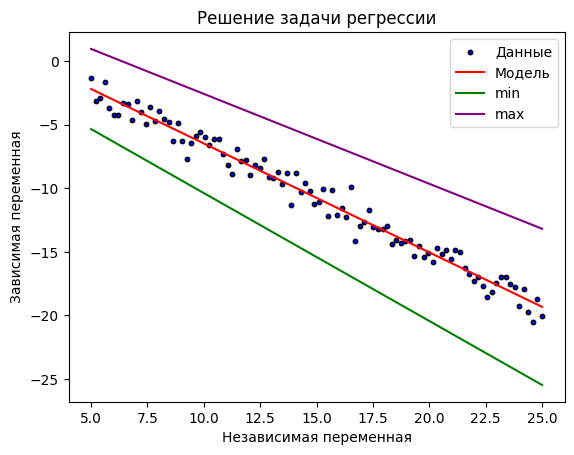

[26. 27. 28.]
[-20.17501588 -21.0304819  -21.88594791]

Интервальная оценка прогноза: x =  26.0
-29.119606115070813  <  -20.175015877766683  <  -11.230425640462553

Интервальная оценка прогноза: x =  27.0
-30.003676000081356  <  -21.030481895415434  <  -12.057287790749513

Интервальная оценка прогноза: x =  28.0
-30.89013011596213  <  -21.885947913064193  <  -12.881765710166256



In [ ]:
So2 = sum((df1['y'] - ymean) ** 2) / (n - 1)

Sm2 = sum(((a * df1['x'] + b) - ymean) ** 2) / (n - 2)
SM = min(So2,Sm2)
SB = max(So2,Sm2)
F = SB/SM
Fcrit = stats.f.ppf(0.05 , n-2, n-1)
print('F-статистика: ',F,"    F-критическое: ", Fcrit)
if (F>Fcrit):
  print("Нулевая гипотеза H0 отвергается. Модель адекватна.")
else:
  print("Нулевая гипотеза H0 принимается. Модель неадекватна.")
Sm2 = sum(abs((a * df1['x'] + b) - ymean)) / (n - 2)
Ma = Sm2/(xstd * (n**0.5))
Mb = (Sm2*(x2sum**0.5))/(xstd * n)

Ta = a/Ma
Tb = b/Mb
tCrit = stats.t.ppf(1 - 0.05/2, len(df1)-2)
print()
print('Ta: ',Ta,' Tb: ',abs(Tb),"    t-критическое: ", tCrit)
if (abs(Ta)>tCrit):
  print("Параметр a - значимый.")
else:
  print("Параметр a - не значимый.")

if (abs(Tb)>tCrit):
  print("Параметр b - значимый.")
else:
  print("Параметр b - не значимый.")

print("Доверительный интервал для параметра a:")
print(a - tCrit*Ma, ' < ', a, " < ", a + tCrit*Ma)
print("Доверительный интервал для параметра b:")
print(b - tCrit*Mb, ' < ', b, " < ", b + tCrit*Mb)

plt.scatter(df1['x'], df1['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df1['x'], a*df1['x'] + b,  color='red', label='Модель')
plt.plot(df1['x'], (a - tCrit*Ma)*df1['x'] + (b - tCrit*Mb),  color='green', label='min')
plt.plot(df1['x'], (a + tCrit*Ma)*df1['x'] + (b + tCrit*Mb),  color='purple', label='max')
plt.title('Решение задачи регрессии')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()

x_pred = np.array([np.max(df1['x']) + i for i in range(1,4)])
print(x_pred)
y_pred = a*x_pred + b
print(y_pred)
print()

for i in range (0,3):
  E = tCrit*Sm2*((1 + 1/n + ((x_pred[i]-xmean)**2)/(n * xstd * xstd))**0.5)
  print("Интервальная оценка прогноза: x = ", x_pred[i])
  print(y_pred[i] - E, ' < ', y_pred[i], " < ", y_pred[i] + E)
  print()

In [ ]:
df2 = pd.DataFrame()
df2 = pd.read_csv("/content/2.txt", header=None)
df2.columns = ['x','d1','d2','y']
df2

,x,d1,d2,y
0,22.777778,1.0,1.0,-40.171529
1,11.464646,1.0,0.0,-20.703133
2,6.212121,0.0,0.0,-1.820676
3,16.515152,0.0,1.0,-1.062390
4,12.070707,1.0,0.0,-18.710382
...,...,...,...,...
195,17.525253,1.0,0.0,-29.807567
196,5.000000,0.0,1.0,-2.286862
197,11.262626,1.0,1.0,-16.952445
198,20.353535,1.0,1.0,-34.063233



a =  -0.7879808555552993 ;  b =  -1.4638171988818878



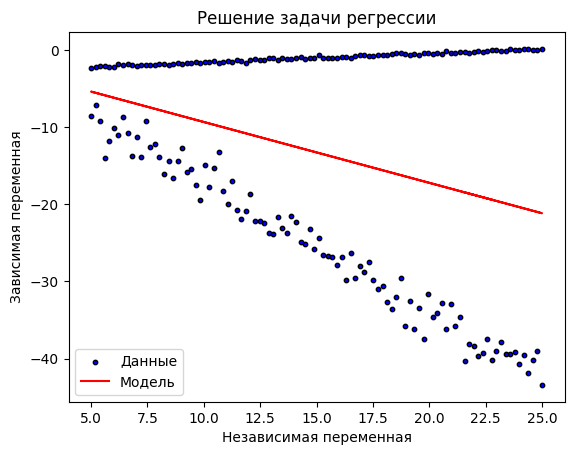

In [ ]:
xsum = df2['x'].sum()
x2sum = (df2['x']**2).sum()
ysum = df2['y'].sum()
xysum = (df2['x'] * df2['y']).sum()
n = len(df2)


b = (ysum*x2sum - xsum*xysum)/(n*x2sum - xsum**2)
a = (n*xysum - xsum*ysum)/(n*x2sum - xsum**2)


print()
print("a = ", a, ";  b = ",b)
print()
plt.scatter(df2['x'], df2['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df2['x'], a*df2['x'] + b,  color='red', label='Модель')
plt.title('Решение задачи регрессии')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()

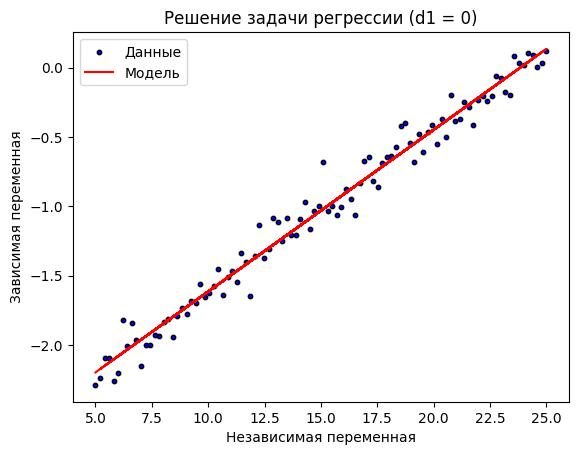

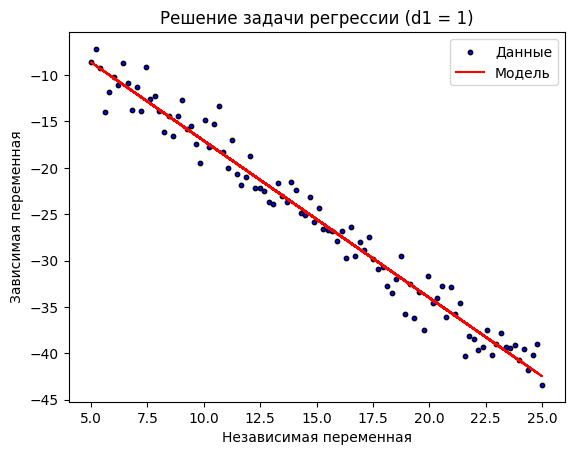

F-статистика:  435.547578827563     F-критическое:  3.0419902345156493
Нулевая гипотеза H0 отвергается. Подвыборки неоднородны и деление по выбранному признаку имеет смысл.


In [ ]:
df21 = df2[df2['d1'] == 0]
df22 = df2[df2['d1'] == 1]

xsum1 = df21['x'].sum()
x2sum1 = (df21['x']**2).sum()
ysum1 = df21['y'].sum()
xysum1 = (df21['x'] * df21['y']).sum()
n1 = len(df21)
xsum2 = df22['x'].sum()
x2sum2 = (df22['x']**2).sum()
ysum2 = df22['y'].sum()
xysum2 = (df22['x'] * df22['y']).sum()
n2 = len(df22)


b1 = (ysum1*x2sum1 - xsum1*xysum1)/(n1*x2sum1 - xsum1**2)
a1 = (n1*xysum1 - xsum1*ysum1)/(n1*x2sum1 - xsum1**2)
b2 = (ysum2*x2sum2 - xsum2*xysum2)/(n2*x2sum2 - xsum2**2)
a2 = (n2*xysum2 - xsum2*ysum2)/(n2*x2sum2 - xsum2**2)


xsum = df2['x'].sum()
x2sum = (df2['x']**2).sum()
ysum = df2['y'].sum()
xysum = (df2['x'] * df2['y']).sum()
n = len(df2)


b = (ysum*x2sum - xsum*xysum)/(n*x2sum - xsum**2)
a = (n*xysum - xsum*ysum)/(n*x2sum - xsum**2)

RSS = ((df2['y'] - (a*df2['x'] +b))**0.5).sum()
RSS1 = ((df21['y'] - (a1*df21['x'] + b1))**0.5).sum()
RSS2 = ((df22['y'] - (a2*df22['x'] + b2))**0.5).sum()

k = 2
F =((RSS - RSS1 - RSS2)/2)/((RSS1 + RSS2)/(n - 2*k))
Fcrit = stats.f.ppf(1 -0.05 , k, n-2*k)

plt.scatter(df21['x'], df21['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df21['x'], a1*df21['x'] + b1,  color='red', label='Модель')
plt.title('Решение задачи регрессии (d1 = 0)')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()
print()


plt.scatter(df22['x'], df22['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df22['x'], a2*df22['x'] + b2,  color='red', label='Модель')
plt.title('Решение задачи регрессии (d1 = 1)')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()


print('F-статистика: ',F,"    F-критическое: ", Fcrit)
if (F>Fcrit):
  print("Нулевая гипотеза H0 отвергается. Подвыборки неоднородны и деление по выбранному признаку имеет смысл.")
else:
  print("Нулевая гипотеза H0 принимается. Подвыборки однородны и деление по выбранному признаку не имеет смысла.")

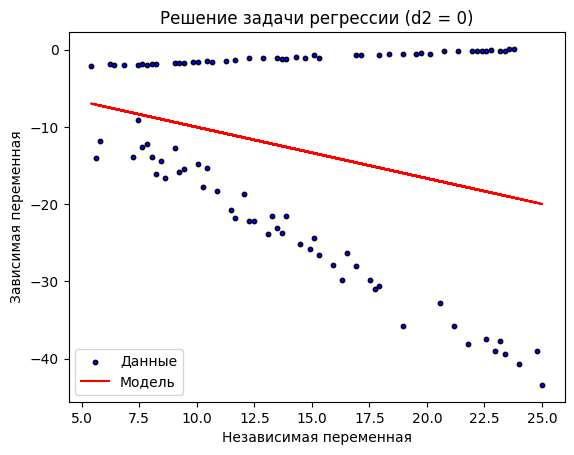

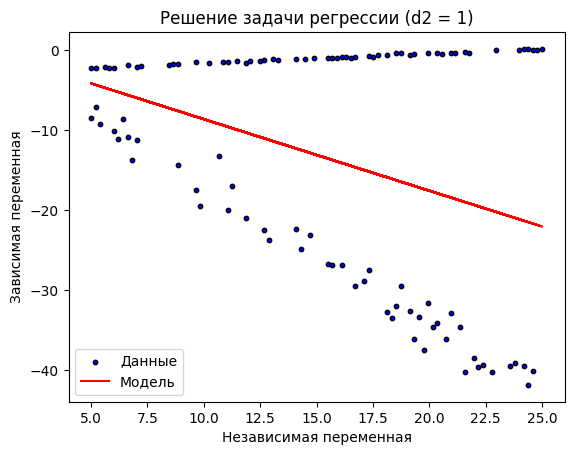

F-статистика:  0.292630560493199     F-критическое:  3.0419902345156493
Нулевая гипотеза H0 принимается. Подвыборки однородны и деление по выбранному признаку не имеет смысла.


In [ ]:
df21 = df2[df2['d2'] == 0]
df22 = df2[df2['d2'] == 1]

xsum1 = df21['x'].sum()
x2sum1 = (df21['x']**2).sum()
ysum1 = df21['y'].sum()
xysum1 = (df21['x'] * df21['y']).sum()
n1 = len(df21)
xsum2 = df22['x'].sum()
x2sum2 = (df22['x']**2).sum()
ysum2 = df22['y'].sum()
xysum2 = (df22['x'] * df22['y']).sum()
n2 = len(df22)


b1 = (ysum1*x2sum1 - xsum1*xysum1)/(n1*x2sum1 - xsum1**2)
a1 = (n1*xysum1 - xsum1*ysum1)/(n1*x2sum1 - xsum1**2)
b2 = (ysum2*x2sum2 - xsum2*xysum2)/(n2*x2sum2 - xsum2**2)
a2 = (n2*xysum2 - xsum2*ysum2)/(n2*x2sum2 - xsum2**2)


xsum = df2['x'].sum()
x2sum = (df2['x']**2).sum()
ysum = df2['y'].sum()
xysum = (df2['x'] * df2['y']).sum()
n = len(df2)


b = (ysum*x2sum - xsum*xysum)/(n*x2sum - xsum**2)
a = (n*xysum - xsum*ysum)/(n*x2sum - xsum**2)

RSS = ((df2['y'] - (a*df2['x'] +b))**0.5).sum()
RSS1 = ((df21['y'] - (a1*df21['x'] + b1))**0.5).sum()
RSS2 = ((df22['y'] - (a2*df22['x'] + b2))**0.5).sum()

k = 2
F =((RSS - RSS1 - RSS2)/2)/((RSS1 + RSS2)/(n - 2*k))
Fcrit = stats.f.ppf(1 - 0.05 , k, n-2*k)

plt.scatter(df21['x'], df21['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df21['x'], a1*df21['x'] + b1,  color='red', label='Модель')
plt.title('Решение задачи регрессии (d2 = 0)')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()
print()


plt.scatter(df22['x'], df22['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df22['x'], a2*df22['x'] + b2,  color='red', label='Модель')
plt.title('Решение задачи регрессии (d2 = 1)')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()


print('F-статистика: ',F,"    F-критическое: ", Fcrit)
if (F>Fcrit):
  print("Нулевая гипотеза H0 отвергается. Подвыборки неоднородны и деление по выбранному признаку имеет смысл.")
else:
  print("Нулевая гипотеза H0 принимается. Подвыборки однородны и деление по выбранному признаку не имеет смысла.")

In [ ]:
df3 = pd.DataFrame()
df3 = pd.read_csv("/content/3.txt", header=None)
df3.columns = ['x','y']
df3

,x,y
0,5.000000,-4.463958
1,5.202020,-1.121044
2,5.404040,0.380397
3,5.606061,-7.901985
4,5.808081,-6.085612
...,...,...
95,24.191919,-19.913237
96,24.393939,-45.249672
97,24.595960,8.334108
98,24.797980,4.799277


a =  -0.24540138574784381   b =  -0.22633696336831832


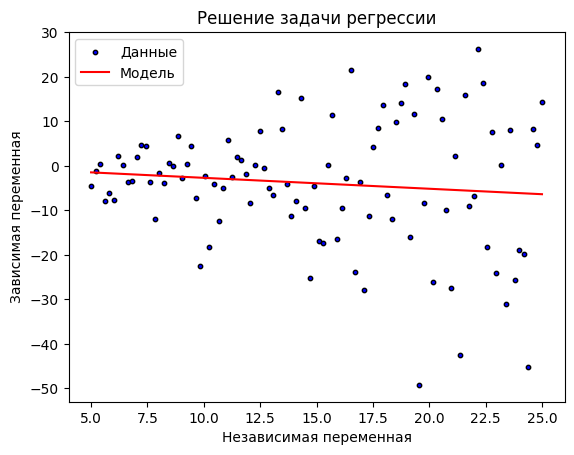

In [ ]:
xsum = df3['x'].sum()
x2sum = (df3['x']**2).sum()
ysum = df3['y'].sum()
xysum = (df3['x'] * df3['y']).sum()
n = len(df3)


b = (ysum*x2sum - xsum*xysum)/(n*x2sum - xsum**2)
a = (n*xysum - xsum*ysum)/(n*x2sum - xsum**2)


print('a = ', a, '  b = ', b)
plt.scatter(df3['x'], df3['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df3['x'], a*df3['x'] + b,  color='red', label='Модель')
plt.title('Решение задачи регрессии')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()

F-статистика:  97.66300516179571     F-критическое:  1.395025696640278
Нулевая гипотеза H0 отвергается. Модель адекватна.

Ta:  -11.372504854545749  Tb:  0.6517470546550803     t-критическое:  1.984467454426692
Параметр a - значимый.
Параметр b - не значимый.
Доверительный интервал для параметра a:
-0.28822318002416364  <  -0.24540138574784381  <  -0.20257959147152402
Доверительный интервал для параметра b:
-0.9154974809803221  <  -0.22633696336831832  <  0.4628235542436855


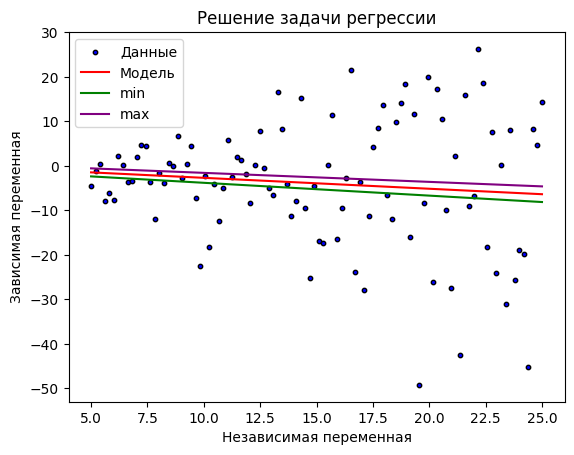

In [ ]:
xmean = df3['x'].mean()
ymean = df3['y'].mean()
xstd = df3['x'].std()
So2 = sum((df3['y'] - ymean) ** 2) / (n - 1)

Sm2 = sum(((a * df3['x'] + b) - ymean) ** 2) / (n - 2)
SM = min(So2,Sm2)
SB = max(So2,Sm2)
F = SB/SM
Fcrit = stats.f.ppf(1 - 0.05 , n-2, n-1)
print('F-статистика: ',F,"    F-критическое: ", Fcrit)
if (F>Fcrit):
  print("Нулевая гипотеза H0 отвергается. Модель адекватна.")
else:
  print("Нулевая гипотеза H0 принимается. Модель неадекватна.")
Sm2 = sum(abs((a * df3['x'] + b) - ymean)) / (n - 2)
Ma = Sm2/(xstd * (n**0.5))
Mb = (Sm2*(x2sum**0.5))/(xstd * n)

Ta = a/Ma
Tb = b/Mb
tCrit = stats.t.ppf(1 - 0.05/2, len(df3)-2)
print()
print('Ta: ',Ta,' Tb: ',abs(Tb),"    t-критическое: ", tCrit)
if (abs(Ta)>tCrit):
  print("Параметр a - значимый.")
else:
  print("Параметр a - не значимый.")

if (abs(Tb)>tCrit):
  print("Параметр b - значимый.")
else:
  print("Параметр b - не значимый.")

  print("Доверительный интервал для параметра a:")
print(a - tCrit*Ma, ' < ', a, " < ", a + tCrit*Ma)
print("Доверительный интервал для параметра b:")
print(b - tCrit*Mb, ' < ', b, " < ", b + tCrit*Mb)

plt.scatter(df3['x'], df3['y'], s=10, color = 'blue', edgecolor = 'black', label='Данные')
plt.plot(df3['x'], a*df3['x'] + b,  color='red', label='Модель')
plt.plot(df3['x'], (a - tCrit*Ma)*df3['x'] + (b - tCrit*Mb),  color='green', label='min')
plt.plot(df3['x'], (a + tCrit*Ma)*df3['x'] + (b + tCrit*Mb),  color='purple', label='max')
plt.title('Решение задачи регрессии')
plt.ylabel('Зависимая переменная')
plt.xlabel('Независимая переменная')
plt.legend()
plt.show()

In [ ]:
x = df3['x']
df3['e'] = abs(df3['y'] - (a*df3['x'] + b))
df3['xr'] = df3['x'].rank()
df3['er'] = df3['e'].rank()
Rs = 1 - ((6 * sum((df3['er'] - df3['xr'])**2))/(n*(n**2 - 1)))
Ts = (Rs*((n-2)**0.5))/((1- Rs**2)**0.5)
tCrit = stats.t.ppf(1 - 0.05/2, len(df3)-2)
print('T-статистика: ',F,"    T-критическое: ", Fcrit)
if (Ts>tCrit):
  print("Гетероскедастичность присутствует. Дисперсия вдоль линейной регрессионной зависимости неоднородна.")
else:
  print("Гетероскедастичность отсутствует. Дисперсия вдоль линейной регрессионной зависимости однородна.")

T-статистика:  97.66300516179571     T-критическое:  1.395025696640278
Гетероскедастичность присутствует. Дисперсия вдоль линейной регрессионной зависимости неоднородна.


In [ ]:
df3 = df3.sort_values(by='x', ascending=False)
m1 = (n*3)//8
m2 = n - m1

F = (sum((a*df3['x'].head(m1) - df3['y'].head(m1))**2) / (m1 -1))/(sum((a*df3['x'].tail(m2) - df3['y'].tail(m2))**2) / (m2 -1))
Fcrit = stats.f.ppf(1 - 0.05 , m1-1, m2-1)
print('F-статистика: ',F,"    F-критическое: ", Fcrit)
if (F>Fcrit):
  print("Гетероскедастичность присутствует. Дисперсия вдоль линейной регрессионной зависимости неоднородна.")
else:
  print("Гетероскедастичность отсутствует. Дисперсия вдоль линейной регрессионной зависимости однородна.")

F-статистика:  4.485076747216307     F-критическое:  1.6067833987382885
Гетероскедастичность присутствует. Дисперсия вдоль линейной регрессионной зависимости неоднородна.
